# IU Online Application Evaluation and Optimization

## Descriptive Analysis

---

#### Client: Sharon Wavle

---

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def describe_momentums(df):
    stats = df.describe(percentiles=[.5])
    stats.rename(index={'50%': 'median'}, inplace=True)
    stats = stats.reindex(['count', 'min', 'max', 'median', 'mean', 'std'])
    stats = stats.append(pd.Series(data=df.skew(), name='skew'))
    stats = stats.append(pd.Series(data=df.kurt(), name='kurt'))
    return stats

In [3]:
fname = 'data.csv'
df = pd.read_csv(fname, skiprows=range(1, 2))

print(df.columns.values)

['ID' 'StartDate' 'EndDate' 'Status' 'IPAddress' 'Progress'
 'Duration (in seconds)' 'Finished' 'RecordedDate' 'ResponseId'
 'RecipientLastName' 'RecipientFirstName' 'RecipientEmail'
 'ExternalReference' 'LocationLatitude' 'LocationLongitude'
 'DistributionChannel' 'UserLanguage' 'Q1_4' 'Q1_5' 'Q2' 'Q3' 'Q4' 'Q5'
 'Q6' 'Q7_1' 'Q7_2' 'Q7_3' 'Q8' 'Q9' 'Q10' 'Q11' 'Q13'
 'Q14_1 (Converted to Age)' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19' 'Q20' 'Q21'
 'Q22' 'Q23_1' 'Q23_2' 'Q23_3' 'Q24' 'Q25' 'Q26' 'Q27' 'Q28' 'Q29' 'Q89'
 'Q30_8' 'Q30_9' 'Q30_3' 'Q30_4' 'Q30_5' 'Q30_6' 'Q30_2' 'Q31_3' 'Q31_4'
 'Q31_5' 'Q31_6' 'Q31_2' 'Q32' 'Q33' 'Q34_3' 'Q34_4' 'Q34_5' 'Q34_6'
 'Q34_2' 'Q35' 'Q36' 'Q37' 'Q38_1' 'Q38_3' 'Q38_4' 'Q38_5' 'Q38_6' 'Q39'
 'Q40' 'Q41' 'Q42' 'Q43_2' 'Q43_5' 'Q43_3' 'Q43_10' 'Q43_11' 'Q44' 'Q45_2'
 'Q45_5' 'Q45_4' 'Q45_11' 'Q45_12' 'Q46_2' 'Q46_5' 'Q46_4' 'Q46_11'
 'Q46_12' 'Q47_2' 'Q47_5' 'Q47_4' 'Q47_11' 'Q47_12' 'Q48' 'Q49_2' 'Q49_5'
 'Q49_4' 'Q49_10' 'Q49_11' 'Q50_2' 'Q50_5' 'Q50_4' 'Q50

/home/shreyasfadnavis/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (69,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,168,180) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Column refactoring

Some columns have very long names. It is more practical to refactor them.

In [4]:
df.rename(columns={'Duration (in seconds)': 'Duration'}, inplace=True)
df.rename(columns={'Q14_1 (Converted to Age)': 'Q14_1'}, inplace=True)
df.rename(columns={'Access Zip': 'AccessZip'}, inplace=True)
df.rename(columns={'Access Country': 'AccessCountry'}, inplace=True)
df.rename(columns={'Access Date': 'AccessDate'}, inplace=True)
df.rename(columns={'Access Time': 'AccessTime'}, inplace=True)
df.rename(columns={'Inquiry type': 'InquiryType'}, inplace=True)
df.rename(columns={'Mobile Device': 'MobileDevice'}, inplace=True)
df.rename(columns={'Mobile type': 'MobileType'}, inplace=True)
df.rename(columns={'UG Campus': 'UGCampus'}, inplace=True)
df.rename(columns={'Campus assignment': 'CampusAssignment'}, inplace=True)
df.rename(columns={'Q52_2 - Topics': 'Q52_2'}, inplace=True)
df.rename(columns={'56_5 - Topics': 'Q56_5'}, inplace=True)

print(df.columns.values)

['ID' 'StartDate' 'EndDate' 'Status' 'IPAddress' 'Progress' 'Duration'
 'Finished' 'RecordedDate' 'ResponseId' 'RecipientLastName'
 'RecipientFirstName' 'RecipientEmail' 'ExternalReference'
 'LocationLatitude' 'LocationLongitude' 'DistributionChannel'
 'UserLanguage' 'Q1_4' 'Q1_5' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7_1' 'Q7_2'
 'Q7_3' 'Q8' 'Q9' 'Q10' 'Q11' 'Q13' 'Q14_1' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19'
 'Q20' 'Q21' 'Q22' 'Q23_1' 'Q23_2' 'Q23_3' 'Q24' 'Q25' 'Q26' 'Q27' 'Q28'
 'Q29' 'Q89' 'Q30_8' 'Q30_9' 'Q30_3' 'Q30_4' 'Q30_5' 'Q30_6' 'Q30_2'
 'Q31_3' 'Q31_4' 'Q31_5' 'Q31_6' 'Q31_2' 'Q32' 'Q33' 'Q34_3' 'Q34_4'
 'Q34_5' 'Q34_6' 'Q34_2' 'Q35' 'Q36' 'Q37' 'Q38_1' 'Q38_3' 'Q38_4' 'Q38_5'
 'Q38_6' 'Q39' 'Q40' 'Q41' 'Q42' 'Q43_2' 'Q43_5' 'Q43_3' 'Q43_10' 'Q43_11'
 'Q44' 'Q45_2' 'Q45_5' 'Q45_4' 'Q45_11' 'Q45_12' 'Q46_2' 'Q46_5' 'Q46_4'
 'Q46_11' 'Q46_12' 'Q47_2' 'Q47_5' 'Q47_4' 'Q47_11' 'Q47_12' 'Q48' 'Q49_2'
 'Q49_5' 'Q49_4' 'Q49_10' 'Q49_11' 'Q50_2' 'Q50_5' 'Q50_4' 'Q50_10'
 'Q50_11' 'Q51_2' 'Q51_5' 'Q

### Understanding the time related information

In [5]:
time_df = df[['ID', 'StartDate', 'EndDate', 'Progress', 'Duration', 'Finished', 'RecordedDate', 'AccessDate', 
              'AccessTime']]

time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 9 columns):
ID              25616 non-null int64
StartDate       25616 non-null object
EndDate         25616 non-null object
Progress        25616 non-null int64
Duration        25616 non-null int64
Finished        25616 non-null bool
RecordedDate    25616 non-null object
AccessDate      25616 non-null object
AccessTime      25616 non-null object
dtypes: bool(1), int64(3), object(5)
memory usage: 1.6+ MB


In [6]:
num_df = time_df.select_dtypes(include=[np.number])
num_df = num_df.drop(['ID'], axis=1)
num_df.sample(3)

Progress  Duration
6126         51       241
12547       100       436
14103       100       126

In [7]:
stats = describe_momentums(num_df)
stats

Progress      Duration
count   25616.000000  2.561600e+04
min         0.000000  1.000000e+00
max       100.000000  7.696359e+06
median    100.000000  2.040000e+02
mean       72.730052  4.381541e+03
std        38.399267  1.045965e+05
skew       -0.838935  4.815231e+01
kurt       -1.080638  2.679066e+03

/home/shreyasfadnavis/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/shreyasfadnavis/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


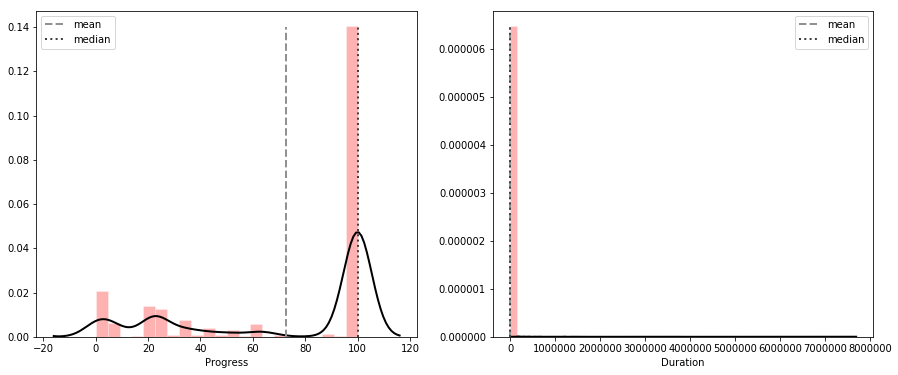

In [8]:
cols_labels = num_df.columns.values
rows = 1
cols = np.floor(len(cols_labels) / rows)
fig = plt.figure(figsize=(15, 6))
for i in range(len(cols_labels)):
    ax = fig.add_subplot(rows, cols, i + 1)
    column = cols_labels[i]
    ax = sns.distplot(num_df[column].dropna(), hist_kws={'color': 'r', 'ec': 'w', 'alpha': 0.3}, 
                      kde_kws={'color': 'k', 'lw': 2}, ax=ax)
    mean = ax.axvline(stats[column].loc['mean'], ymax=0.95, color='#919191', label='mean', ls='--', lw=2)
    median = ax.axvline(stats[column].loc['median'], ymax=0.95, color='#404040', label='median', ls=':', lw=2)
    plt.legend(handles=[mean, median])

In [9]:
cat_df = time_df.select_dtypes(include=[np.object])
cat_df.loc[:, 'Finished'] = df['Finished']
cat_df.sample(3)

/home/shreyasfadnavis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/shreyasfadnavis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


StartDate        EndDate   RecordedDate AccessDate AccessTime  \
15760   8/5/18 23:17   8/5/18 23:20   8/6/18 23:21     8/5/18   23:17:32   
18461  10/7/18 13:47  10/7/18 13:48  10/7/18 13:48    10/7/18   13:47:03   
13958  6/28/18 11:29  6/28/18 11:31  6/28/18 11:31    6/28/18   11:29:11   

       Finished  
15760     False  
18461      True  
13958      True

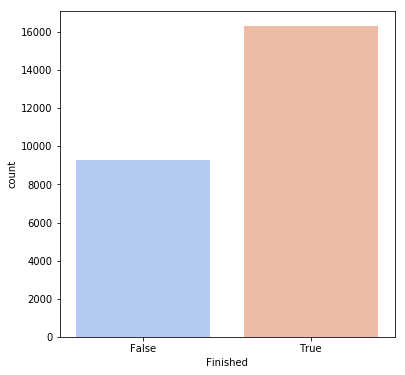

In [10]:
cols_labels = cat_df[['Finished']].columns.values
rows = 1
cols = np.ceil(len(cols_labels) / rows)
fig = plt.figure(figsize=(6, 6))
for i in range(len(cols_labels)):
    ax = fig.add_subplot(rows, cols, i + 1)
    column = cols_labels[i]
    ax = sns.countplot(cat_df[column], palette='coolwarm')

### Understanding the user related information

In [11]:
user_df = df[['ID', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'AccessZip', 'AccessCountry']]

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 6 columns):
ID                    25616 non-null int64
RecipientLastName     0 non-null float64
RecipientFirstName    0 non-null float64
RecipientEmail        0 non-null float64
AccessZip             22156 non-null object
AccessCountry         25604 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


### Understanding the metadata

In [12]:
meta_df = df[['ID', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 
              'UserLanguage', 'source', 'type', 'program_id', 'user', 'InquiryType', 'Q_R_DEL', 'audience', 'date', 
              'level', 'program', 'subject', 'created', 'MobileDevice', 'MobileType', 'UGCampus', 'Grad_prog', 
              'Grad_contact', 'Administrative', 'CampusAssignment', 'Q52_2', 'Q56_5']]

meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 29 columns):
ID                     25616 non-null int64
ExternalReference      0 non-null float64
LocationLatitude       0 non-null float64
LocationLongitude      0 non-null float64
DistributionChannel    25616 non-null object
UserLanguage           24385 non-null object
source                 25400 non-null object
type                   25399 non-null object
program_id             11921 non-null float64
user                   53 non-null float64
InquiryType            23830 non-null object
Q_R_DEL                2136 non-null object
audience               1228 non-null object
date                   1115 non-null float64
level                  6111 non-null object
program                6111 non-null object
subject                1806 non-null object
created                0 non-null float64
MobileDevice           11231 non-null object
MobileType             2823 non-null object
UGCampus   

# Clustering the users according to progress and the time duration taken to fill in 3 Clusters

In [13]:
durarray = np.asarray(time_df['Duration'])
timearray = np.asarray(time_df['Progress'])
prog_array = np.vstack((timearray, durarray))

In [14]:
prog_array = prog_array.swapaxes(0, 1)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(prog_array)
y_kmeans = kmeans.predict(prog_array)

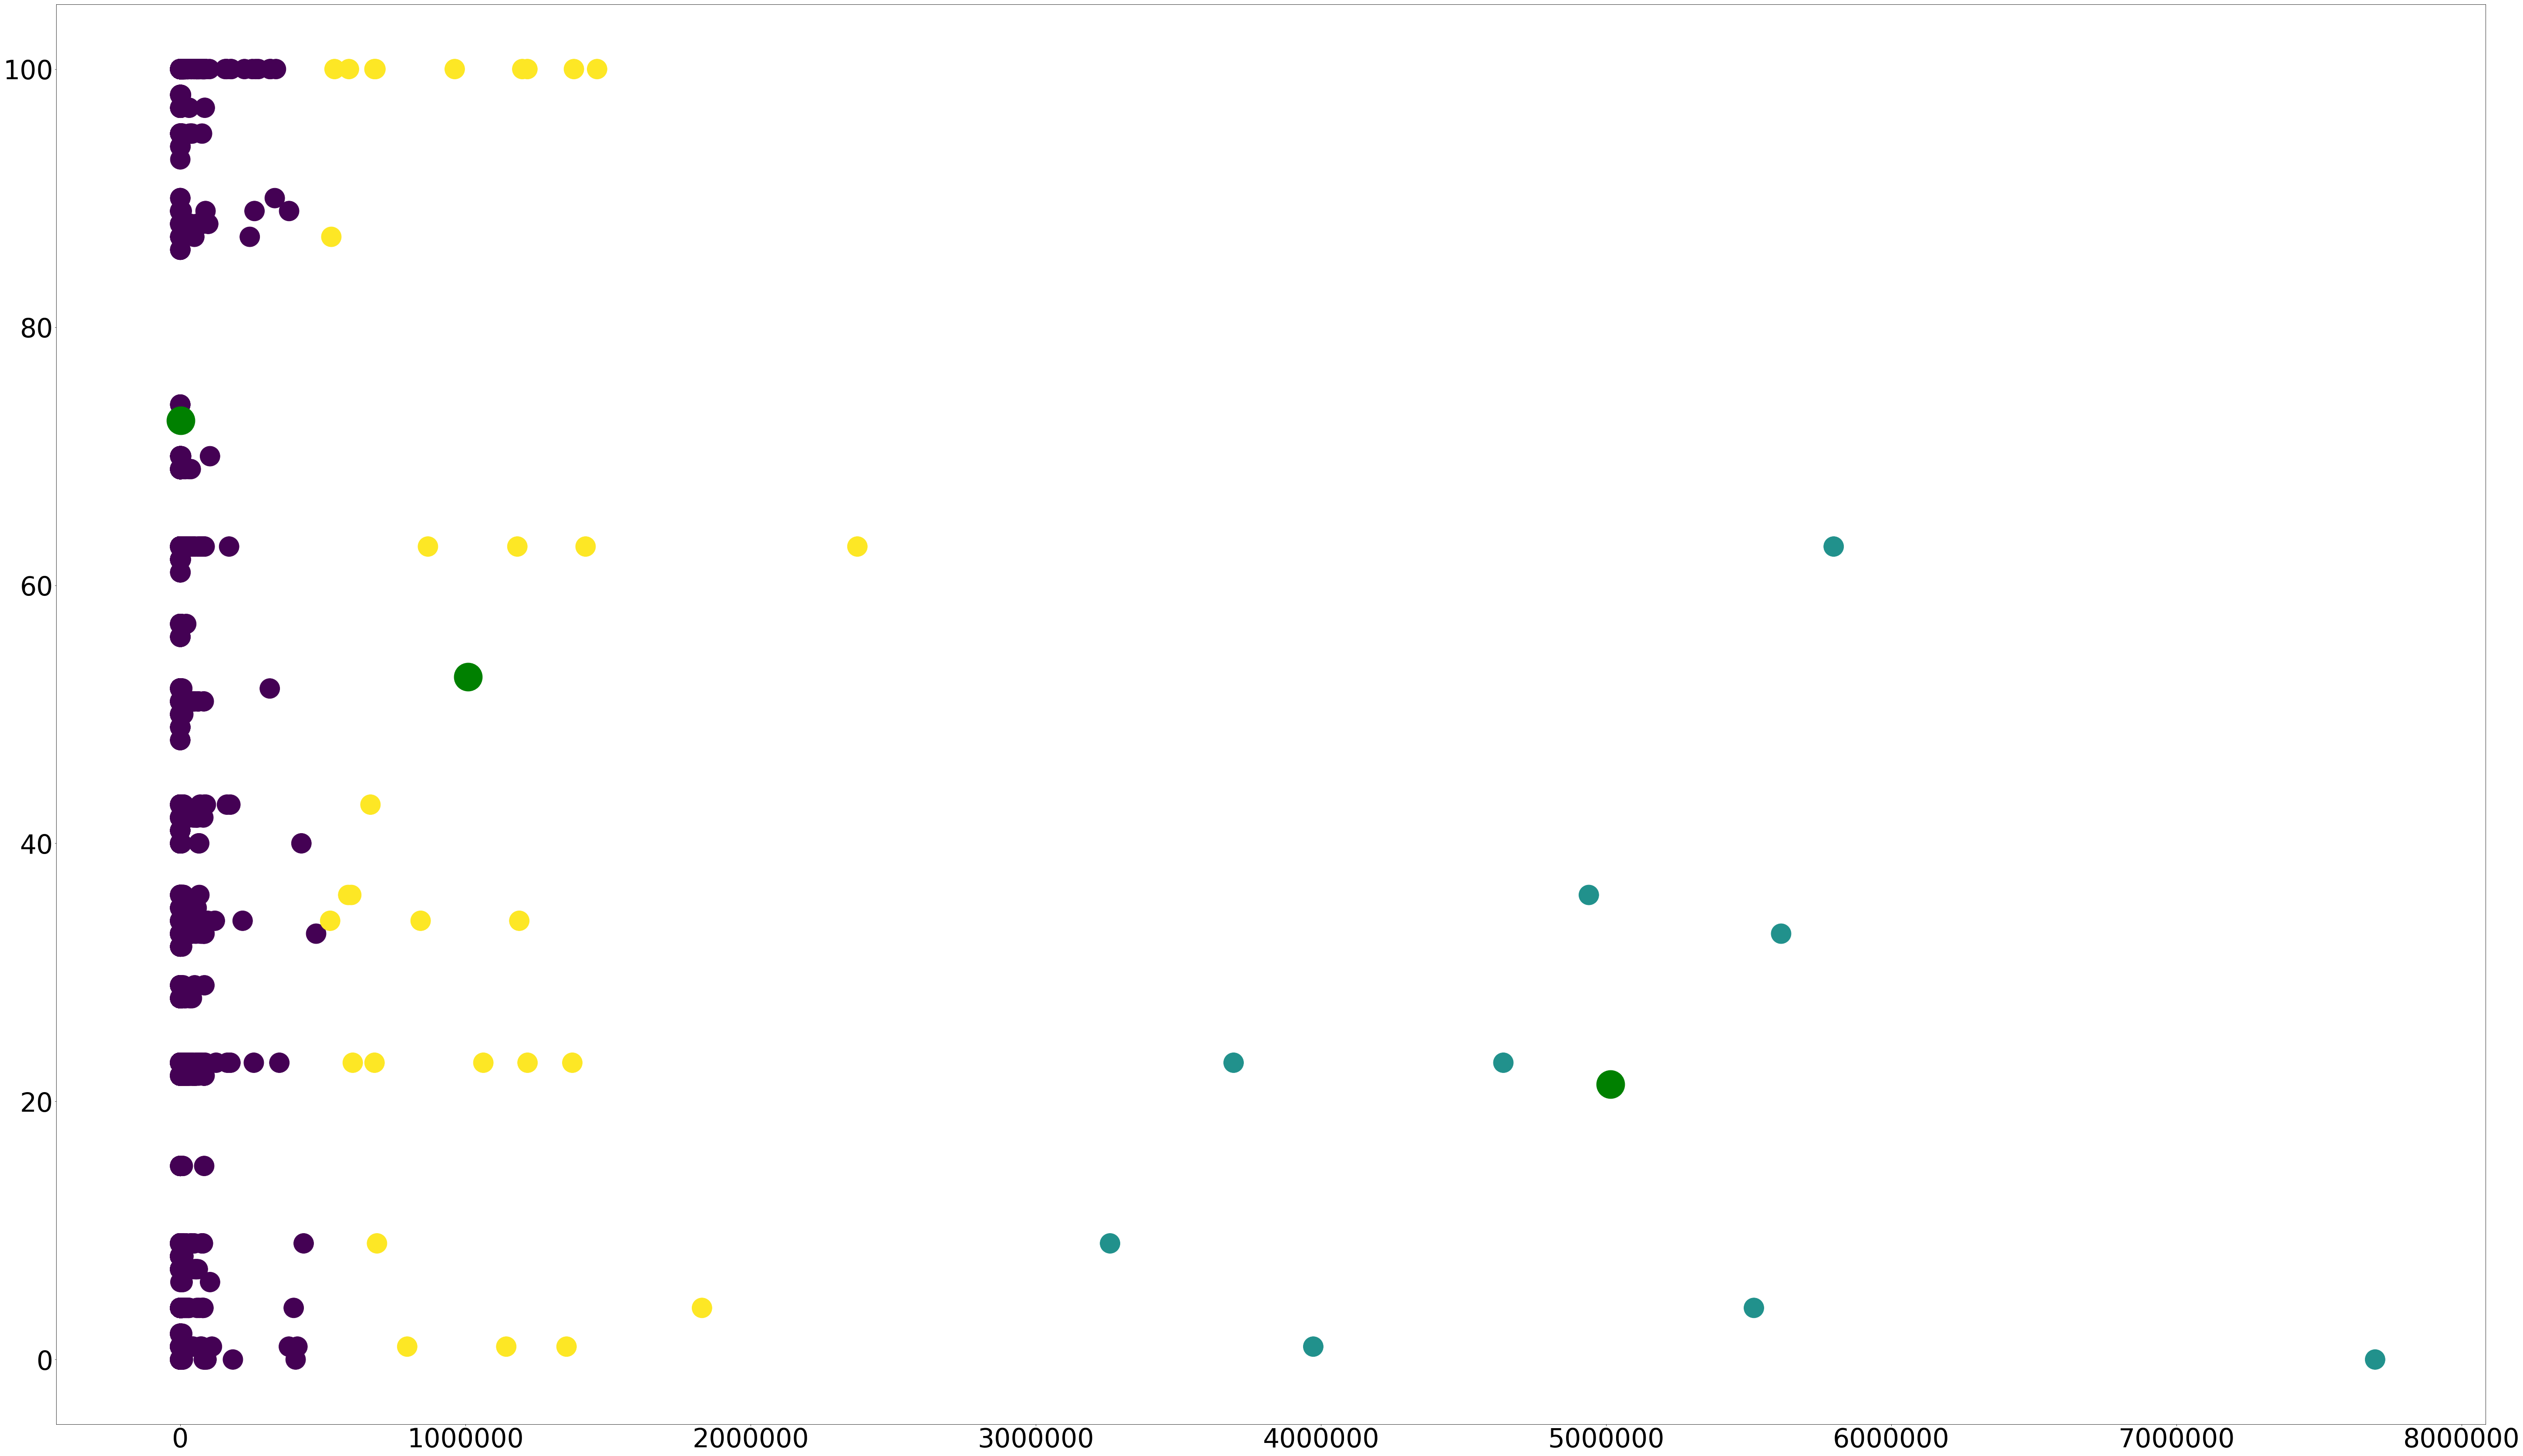

In [16]:
plt.figure(figsize=(100,60))
plt.rcParams.update({'font.size': 60})
plt.scatter(prog_array[:, 1], prog_array[:, 0], c=y_kmeans, s=2100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], s=4200, c='green')

In [17]:
cluster0 = prog_array[np.where(y_kmeans == 0)]
cluster1 = prog_array[np.where(y_kmeans == 1)]
cluster2 = prog_array[np.where(y_kmeans == 2)]

In [18]:
cl0df = pd.DataFrame(cluster0)
cl1df = pd.DataFrame(cluster1)
cl2df = pd.DataFrame(cluster2)

In [19]:
cl0df

0      1
0      100    228
1      100    243
2      100    449
3      100    372
4      100   1229
5      100    345
6      100     99
7      100    325
8      100    175
9      100    175
10     100    247
11     100    198
12     100    361
13     100    678
14     100    375
15     100    306
16     100    224
17     100    549
18     100    187
19     100    190
20     100    106
21     100    115
22     100     60
23     100    570
24     100    384
25     100    948
26     100    224
27     100    198
28     100    293
29     100    537
...    ...    ...
25547   22  82616
25548   42    271
25549   22     30
25550   33   1984
25551  100    558
25552   51    145
25553  100    340
25554  100    360
25555   52   7434
25556  100    530
25557  100    261
25558   22     20
25559    1     28
25560  100     88
25561  100    793
25562   63    227
25563   63     55
25564  100    411
25565  100    789
25566  100    759
25567  100    403
25568  100    156
25569  100     69
25570   33    107
25571  100   1205
25572  100    665
25573  100    224
25574   28     65
25575   63    591
25576  100   1055

[25577 rows x 2 columns]

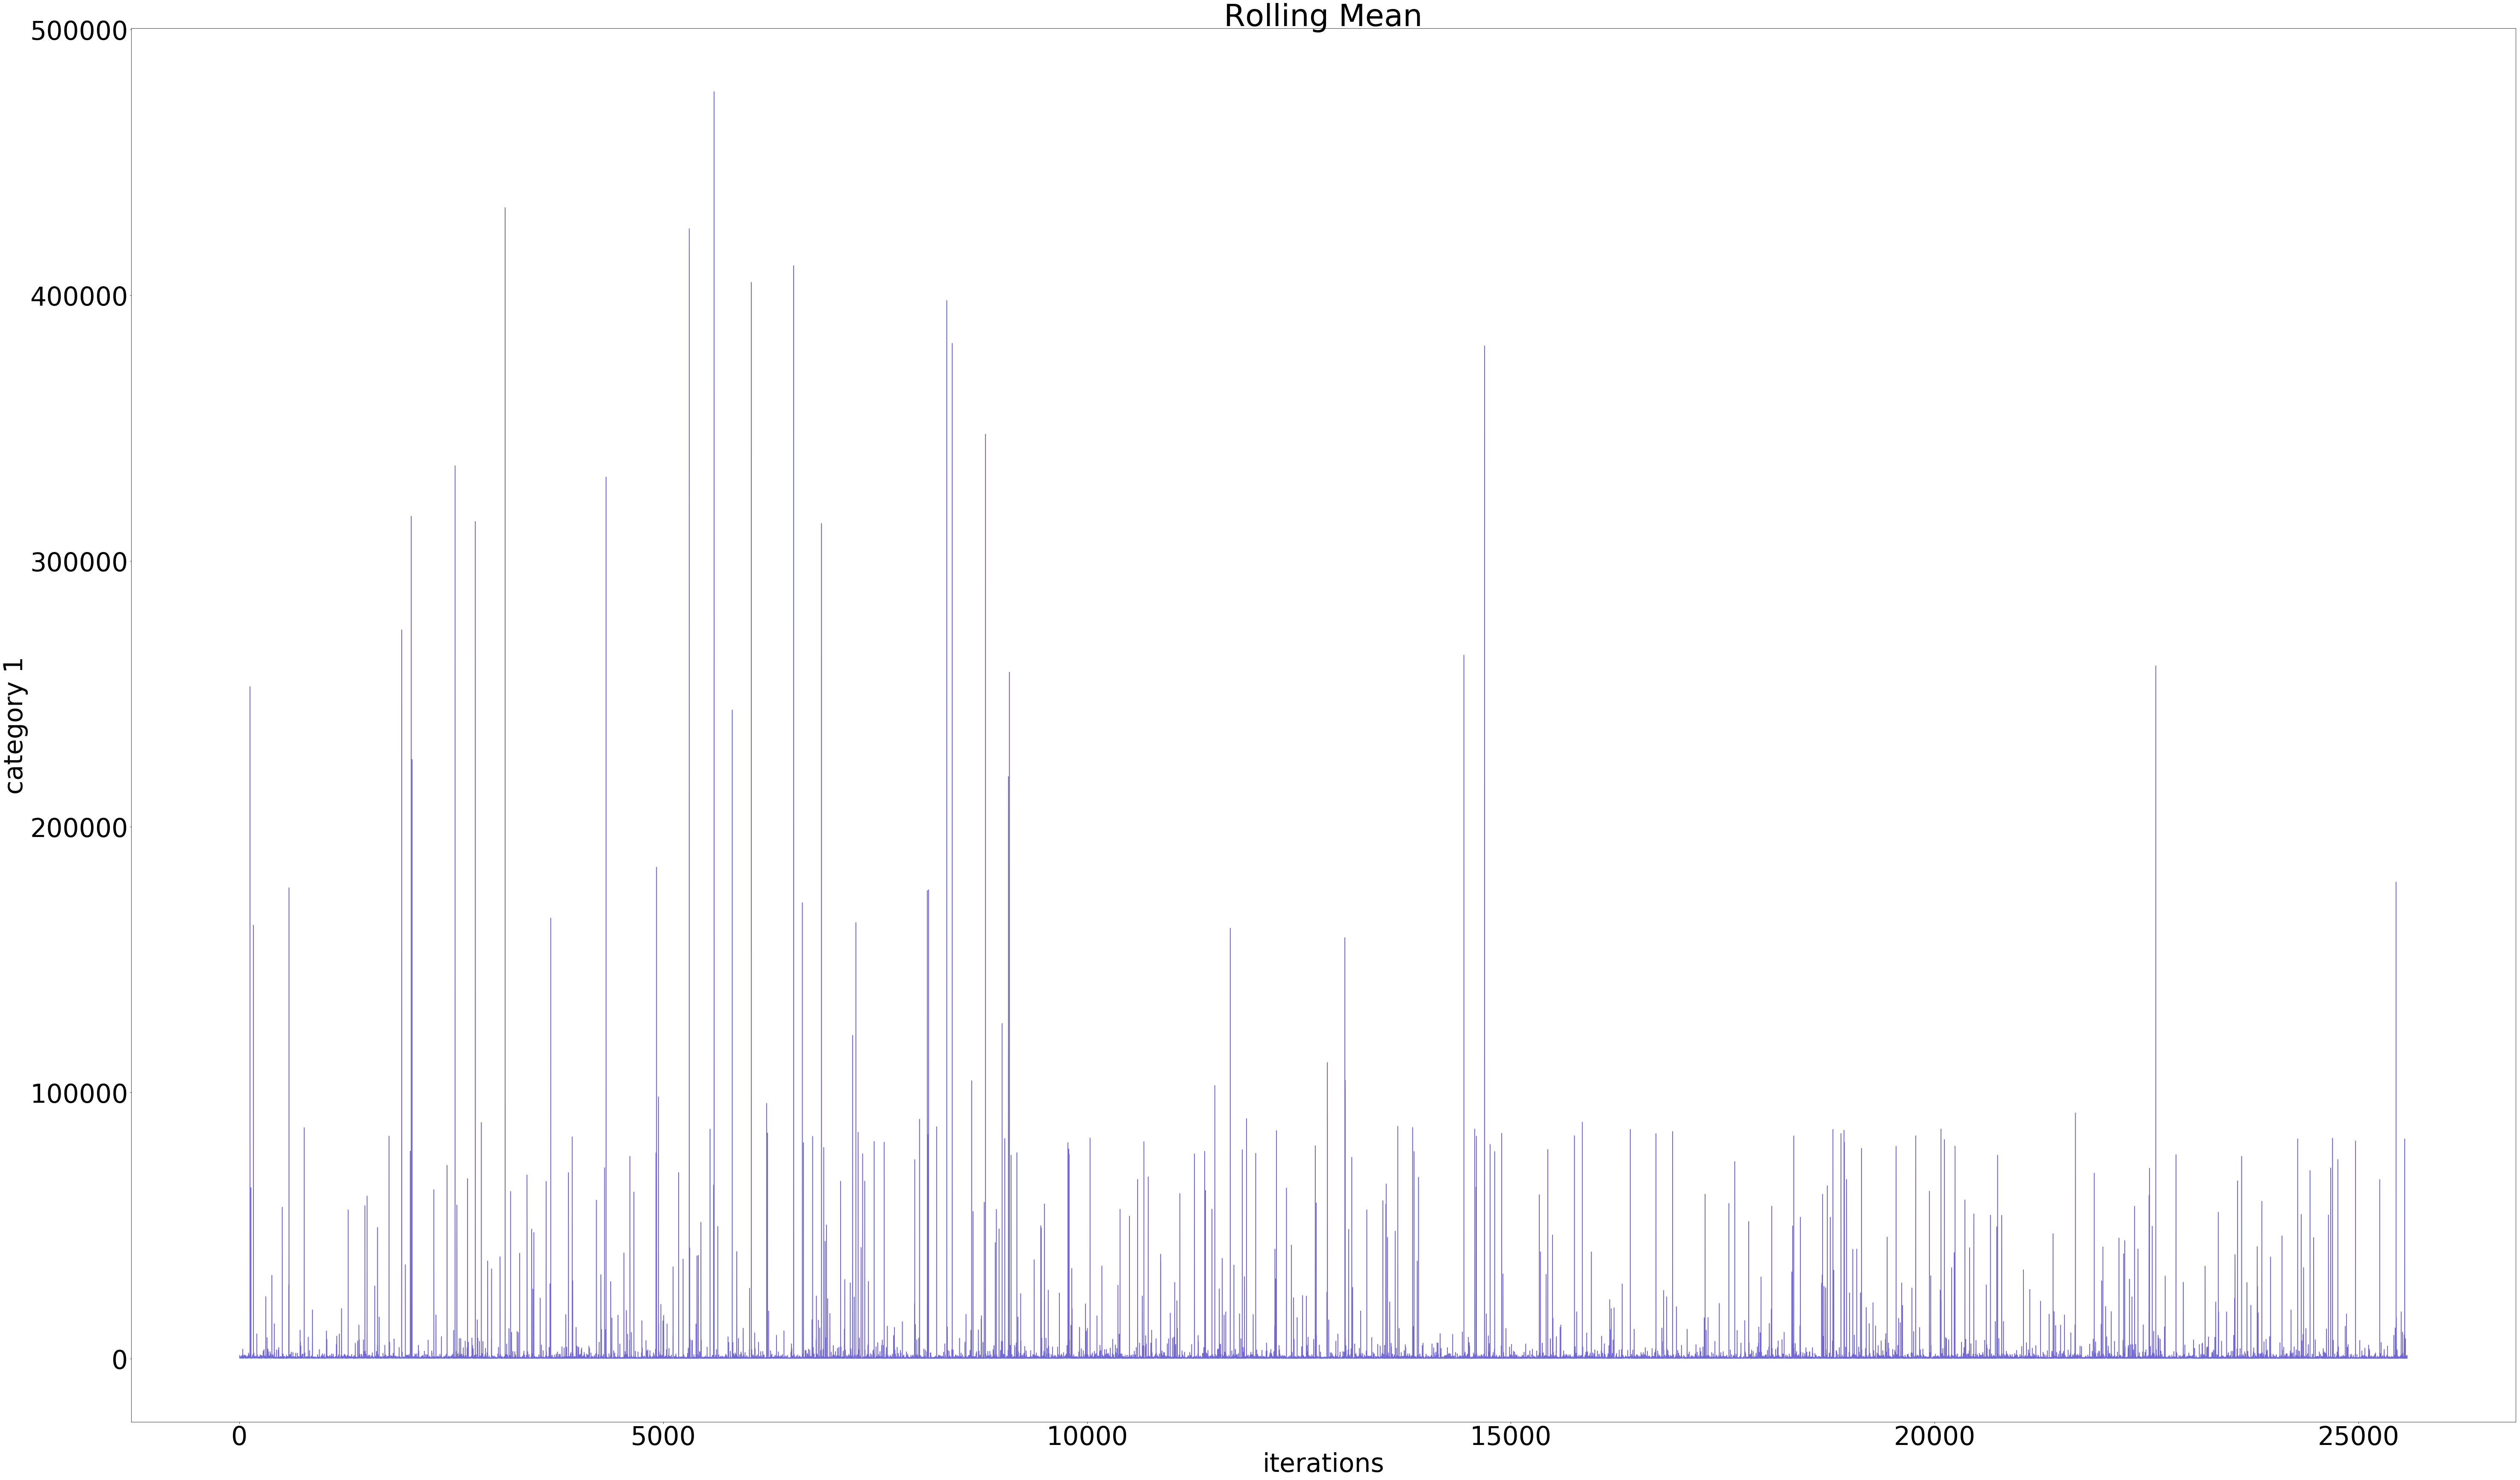

In [44]:
plt.figure(figsize=(100,60))
plt.rcParams.update({'font.size': 60})

mean_x = cl0df.rolling(window=2000).mean()


itr0 = range(len(mean_x))

plt.xlabel("iterations")
plt.ylabel("category 1")
plt.title("Rolling Mean")
plt.plot(itr0, cl0df[1], color="Slateblue", alpha=0.9)
plt.fill_between(itr0, cl0df[1], color="skyblue", alpha=0.4)
plt.show()

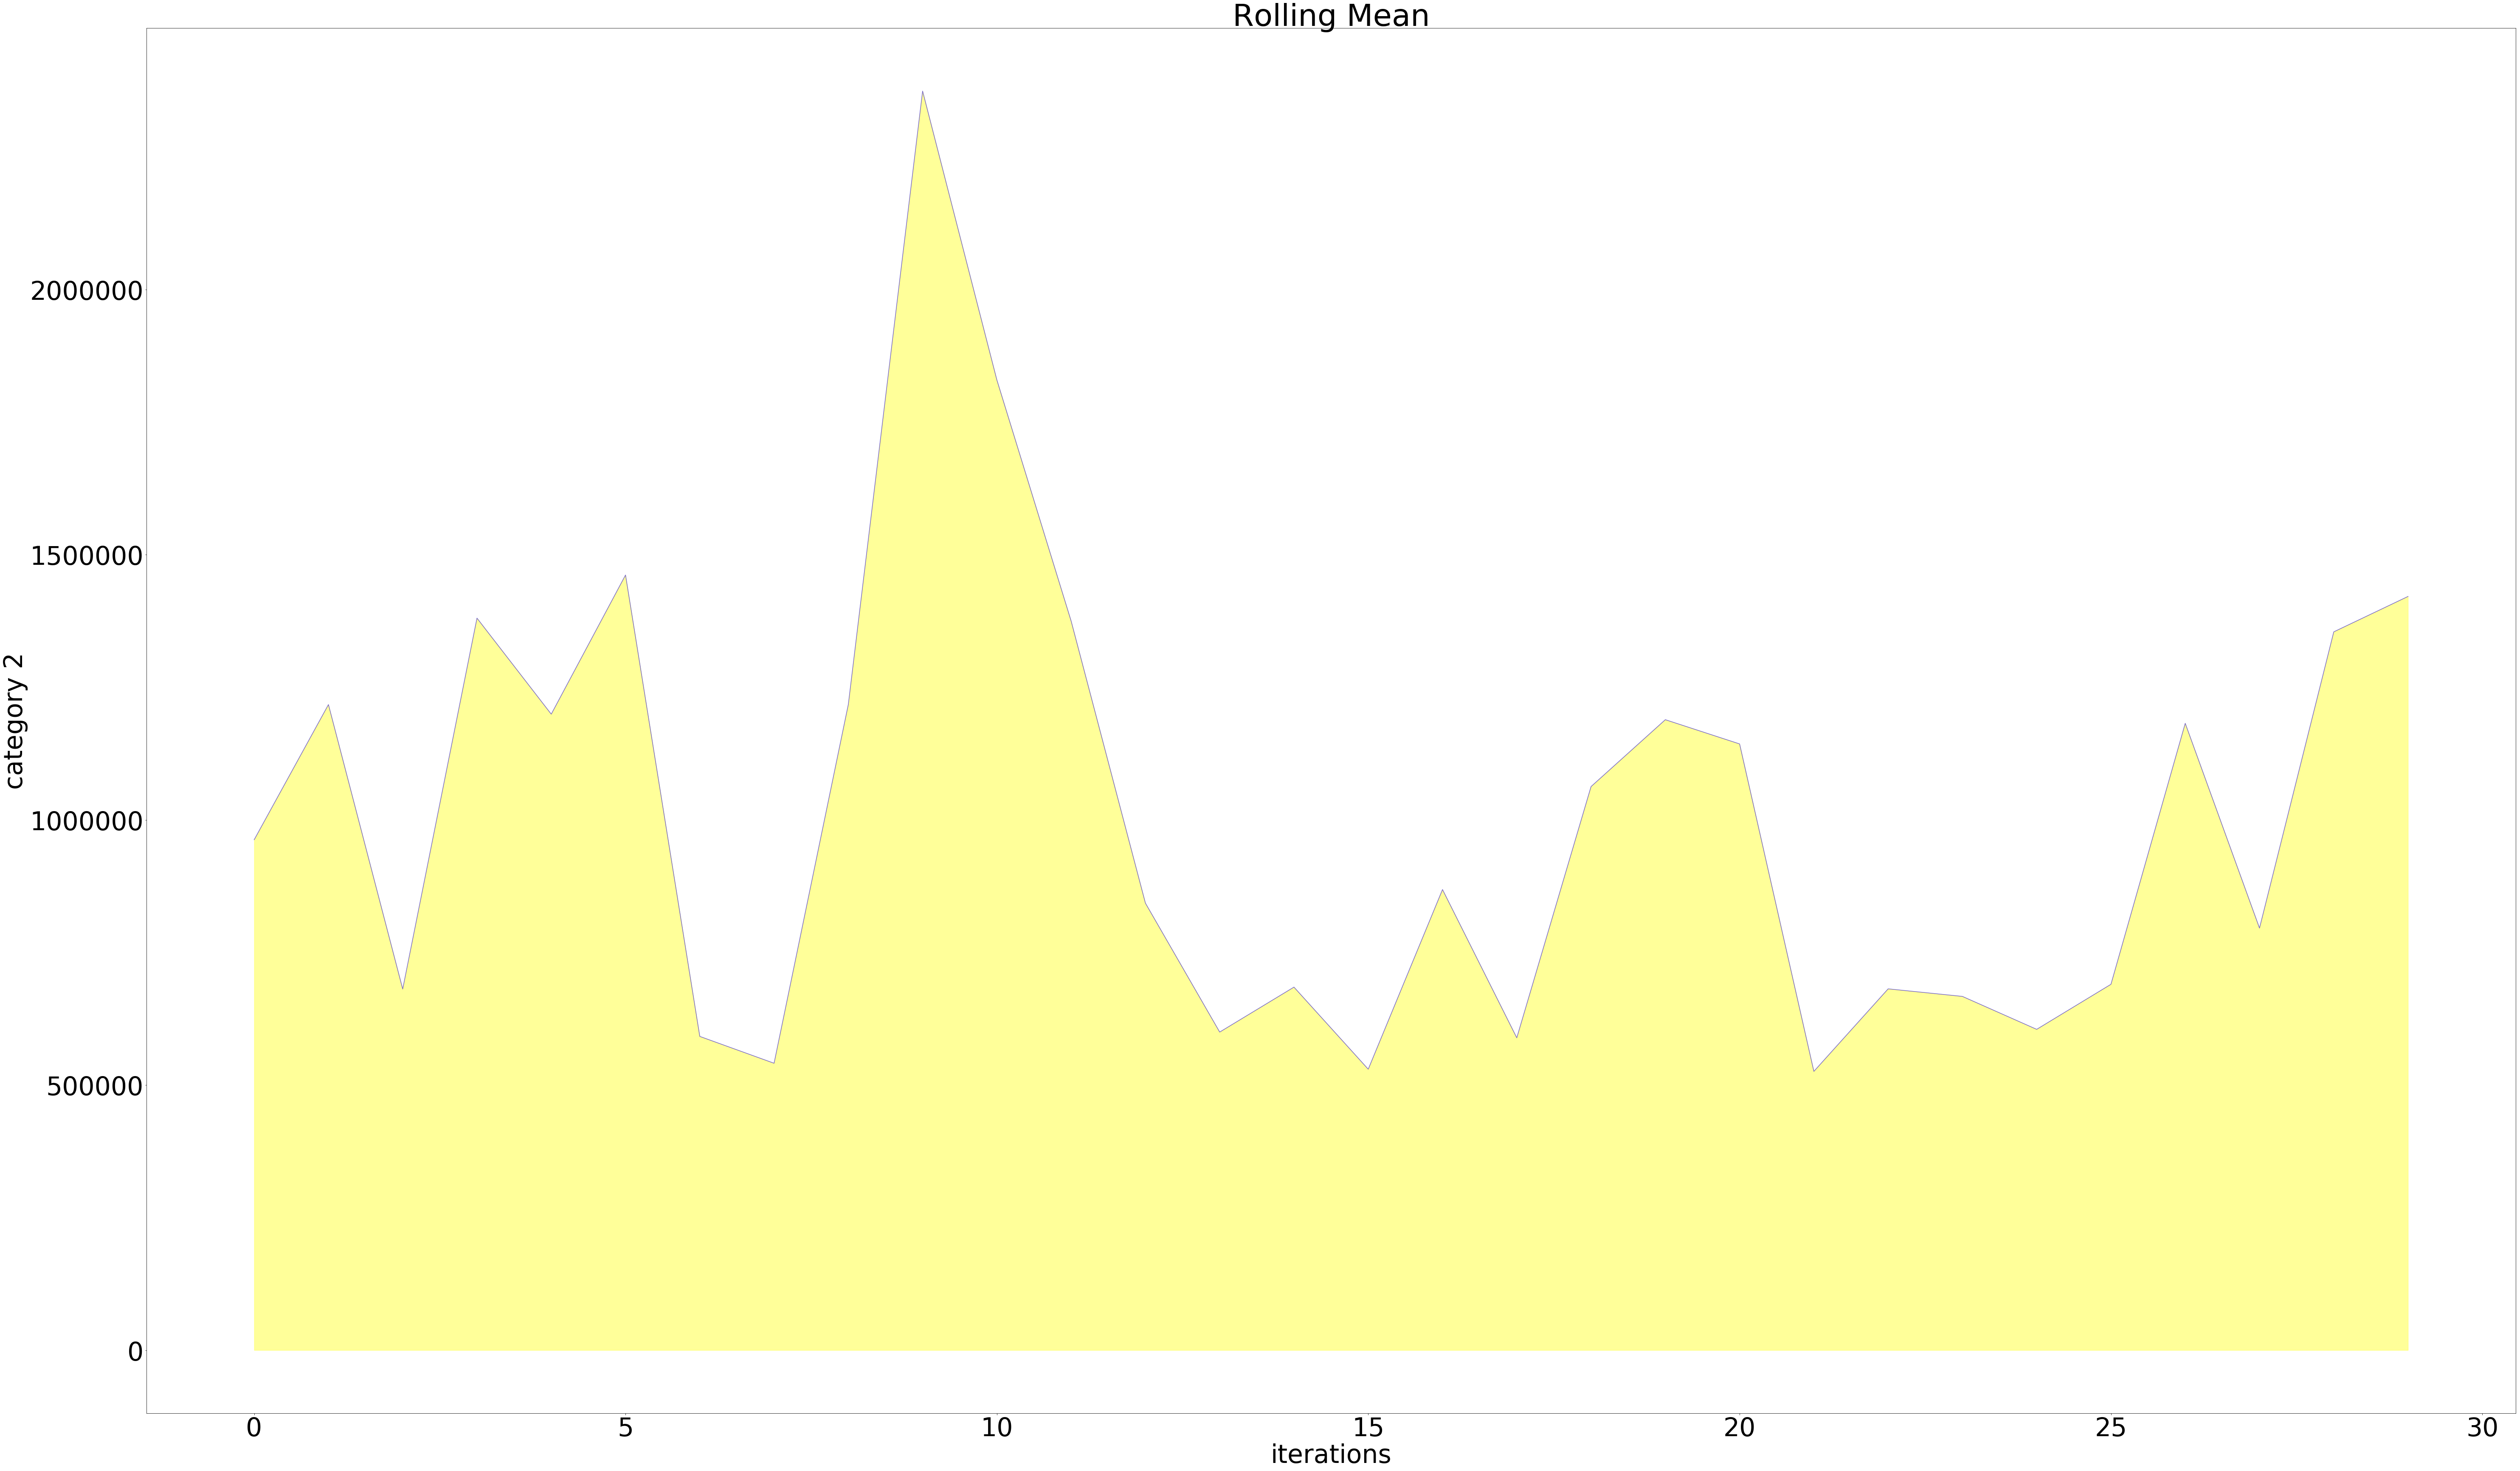

In [37]:
plt.figure(figsize=(100,60))
plt.rcParams.update({'font.size': 60})

mean_x = cl2df.rolling(window=2).mean()


itr1 = range(len(mean_x))

plt.xlabel("iterations")
plt.ylabel("category 2")
plt.title("Rolling Mean")
plt.plot(itr1, cl2df[1], color="Slateblue", alpha=0.9)
plt.fill_between(itr1, cl2df[1], color="yellow", alpha=0.4)
plt.show()

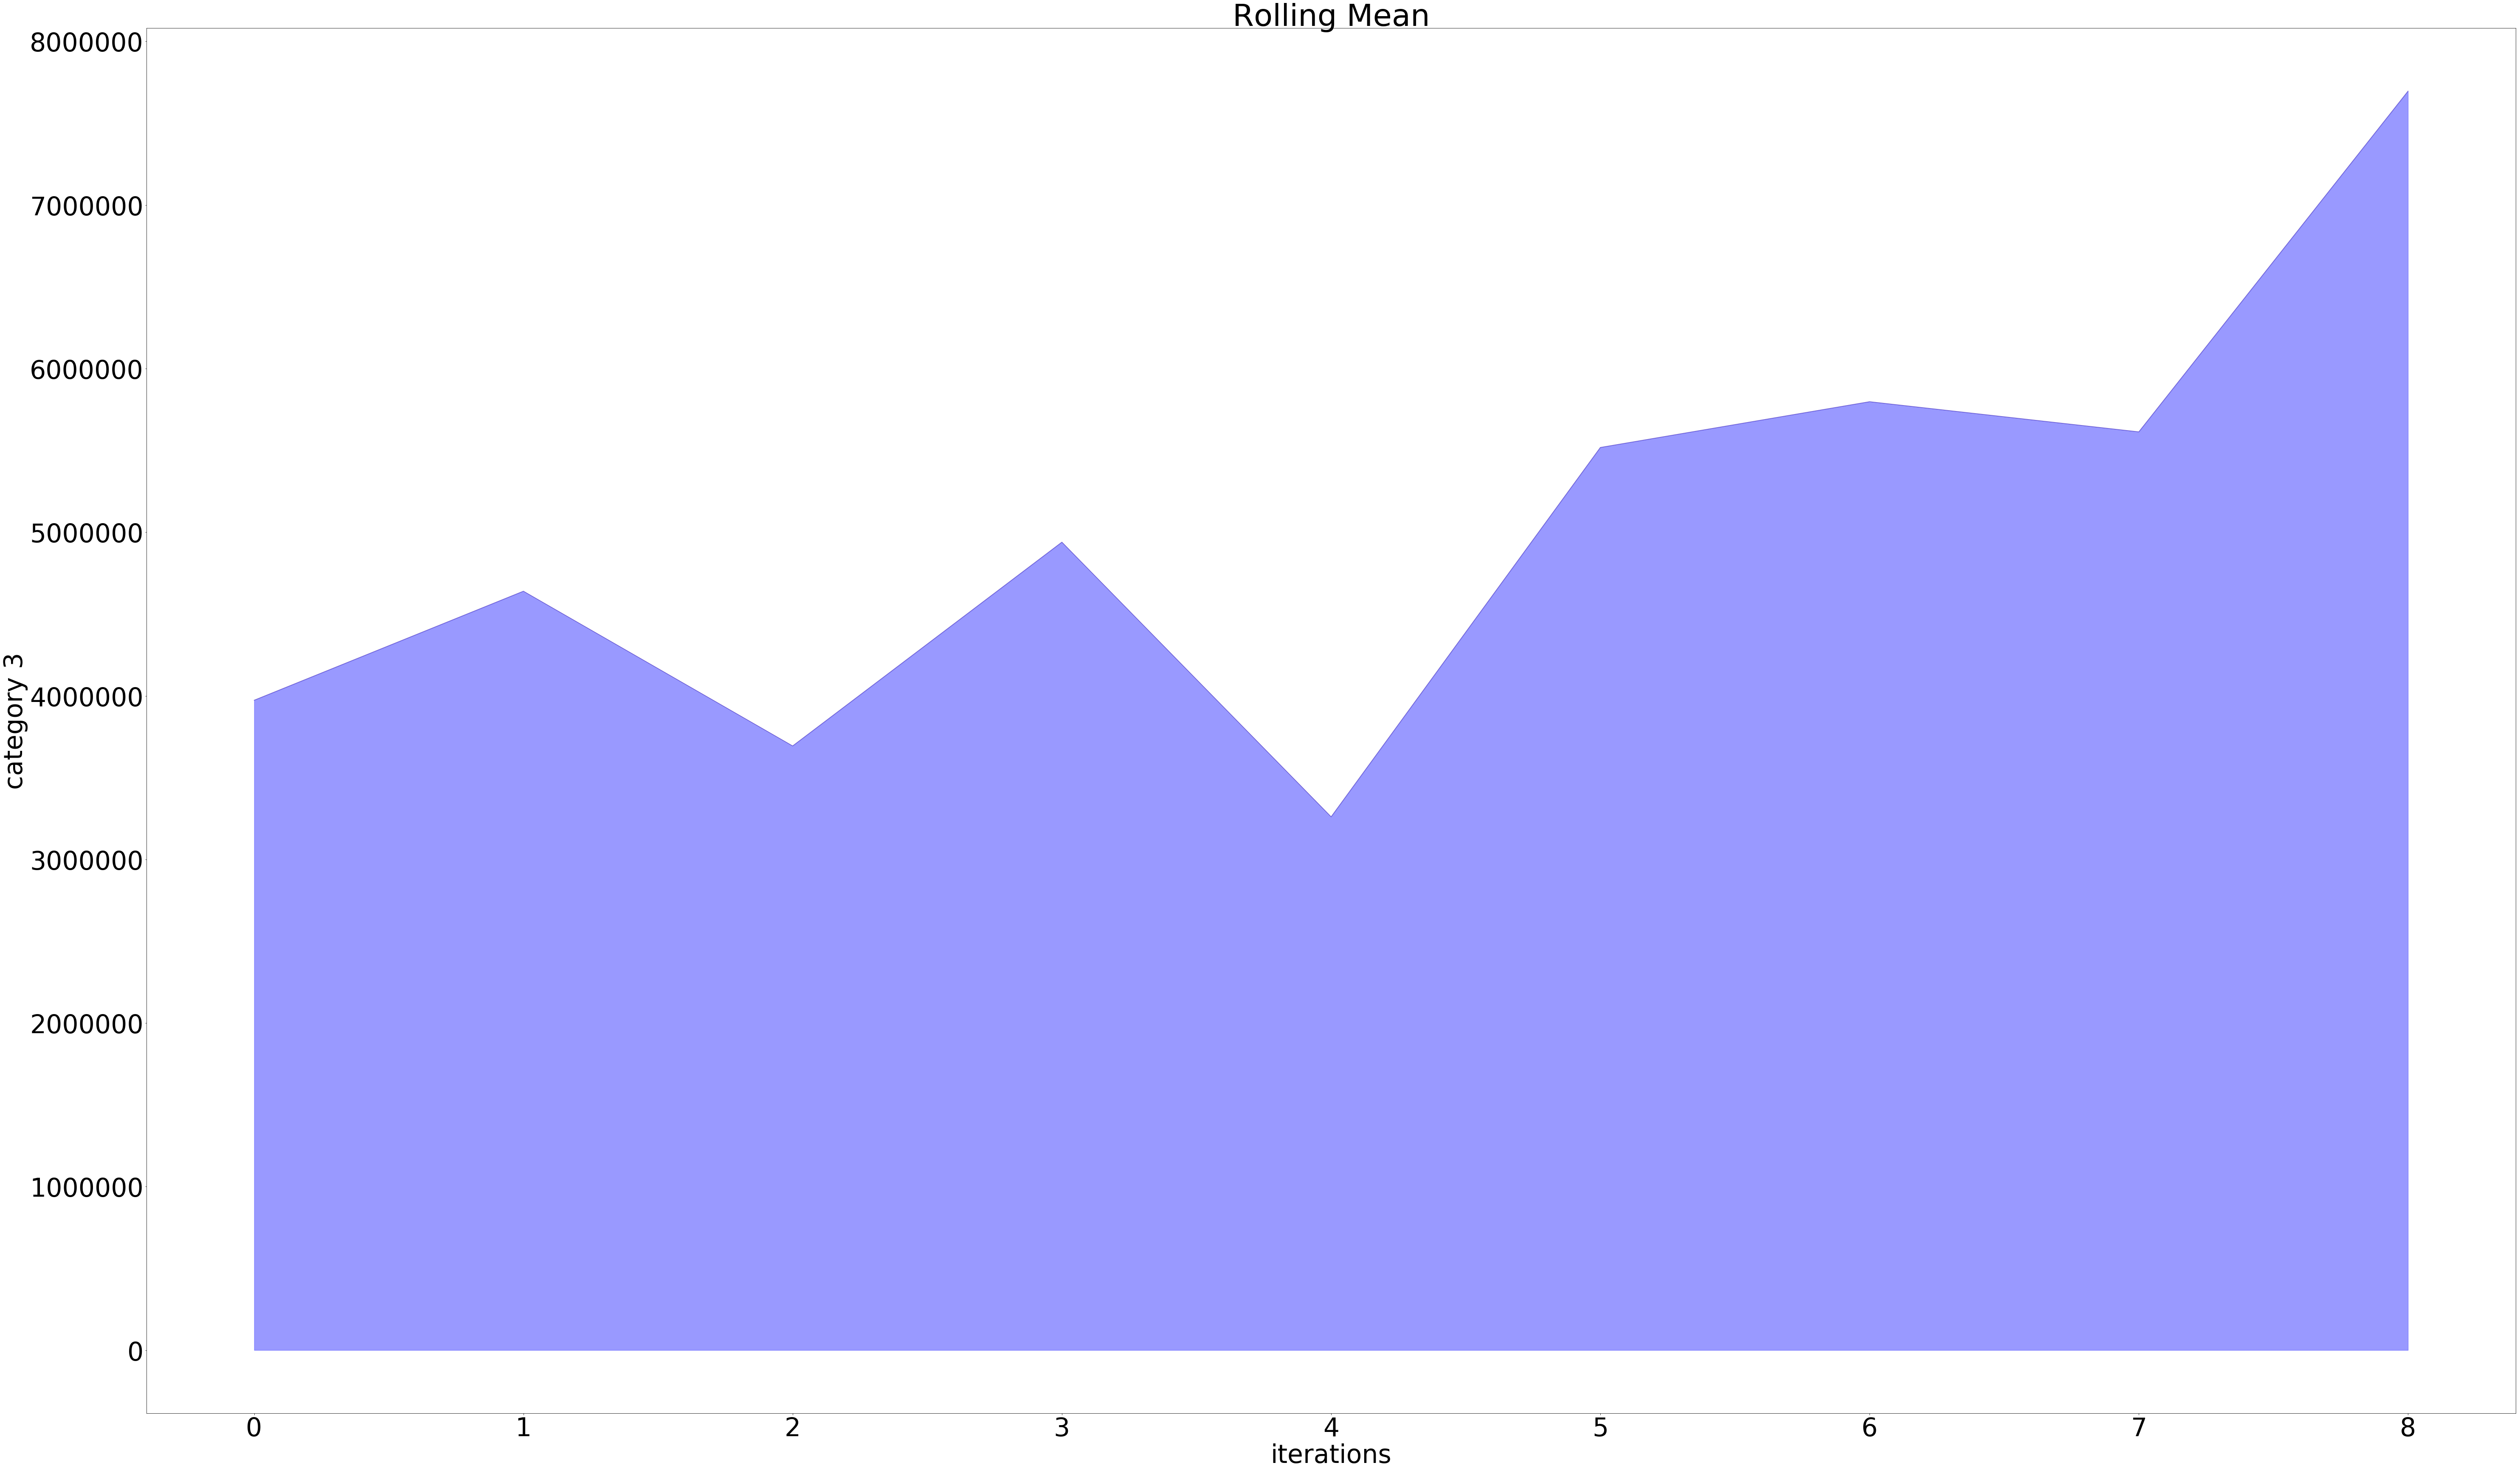

In [39]:
plt.figure(figsize=(100,60))
plt.rcParams.update({'font.size': 60})

mean_x = cl1df.rolling(window=2).mean()


itr2 = range(len(mean_x))

plt.xlabel("iterations")
plt.ylabel("category 3")
plt.title("Rolling Mean")
plt.plot(itr2, cl1df[1], color="Slateblue", alpha=0.9)
plt.fill_between(itr, cl1df[1], color="blue", alpha=0.4)
plt.show()